In [101]:
import pandas as pd

seoul = pd.read_csv('datasets/서울시_월평균_사교육비.csv', skiprows=1)

seoul_df = seoul.drop(index=1)
seoul_df = pd.melt(
    seoul_df,
    value_vars=['항목', '평균', '초등학교', '중학교', '고등학교'],
    var_name='학생 1인당 월평균 사교육비 (만원)',
)

seoul_df = seoul_df.drop(0)
seoul_df.columns = ['학교 구분', '학생 1인당 월 평균 사교육비']

seoul_df['학교 구분'] = seoul_df['학교 구분'].replace('초등학교', '초등학생')
seoul_df['학교 구분'] = seoul_df['학교 구분'].replace('중학교', '중학생')
seoul_df['학교 구분'] = seoul_df['학교 구분'].replace('고등학교', '고등학생')

seoul_df.head()

,학교 구분,학생 1인당 월 평균 사교육비
1,평균,67.3
2,초등학생,60.9
3,중학생,69.1
4,고등학생,76.9


In [90]:
jeju = pd.read_csv('datasets/제주_월평균_사교육비.csv')
jeju.head()

grouped = jeju.groupby('학교 구분')['사교육비(만원)'].mean().round(1).reset_index()
total_mean = jeju['사교육비(만원)'].mean().round(1)

jeju_df = pd.concat([
    pd.DataFrame([{'학교 구분': '평균', '사교육비(만원)': total_mean}]),
    grouped
], ignore_index=True)

jeju_df = jeju_df.drop(2)
jeju_df['학교 구분'] = jeju_df['학교 구분'].replace('초등학교', '초등학생')
jeju_df['학교 구분'] = jeju_df['학교 구분'].replace('중학교', '중학생')
jeju_df['학교 구분'] = jeju_df['학교 구분'].replace('고등학교', '고등학생')


order = ['평균', '초등학생', '중학생', '고등학생']
jeju_df['학교 구분'] = pd.Categorical(jeju_df['학교 구분'], categories=order, ordered=True)
jeju_df = jeju_df.sort_values('학교 구분').reset_index(drop=True)

jeju_df.columns = ['학교 구분', '학생 1인당 월 평균 사교육비']

jeju_df

,학교 구분,학생 1인당 월 평균 사교육비
0,평균,45.3
1,초등학생,30.1
2,중학생,45.2
3,고등학생,51.9


In [102]:
jeonbuk = pd.read_csv('datasets/전북_월평균_사교육비.csv', encoding='euc-kr')
jeonbuk.head()

# melt 적용
jeonbuk_df = pd.melt(
    jeonbuk,
    value_vars=['초등학생', '중학생', '고등학생'],  # 펼칠 열
    var_name='학년구분',
    value_name='값'
)

jeonbuk_df.columns = ['학교 구분', '학생 1인당 월 평균 사교육비']
jeonbuk_df.dropna(inplace=True)

jeonbuk_df = jeonbuk_df.groupby('학교 구분')['학생 1인당 월 평균 사교육비'].mean().round(2).reset_index()

total_mean = jeonbuk_df['학생 1인당 월 평균 사교육비'].mean().round(1)
jeonbuk_df = pd.concat([
    pd.DataFrame([{'학교 구분': '평균', '학생 1인당 월 평균 사교육비': total_mean}]),
    jeonbuk_df
], ignore_index=True)


jeonbuk_df['학교 구분'] = jeonbuk_df['학교 구분'].replace('초등학교', '초등학생')
jeonbuk_df['학교 구분'] = jeonbuk_df['학교 구분'].replace('중학교', '중학생')
jeonbuk_df['학교 구분'] = jeonbuk_df['학교 구분'].replace('고등학교', '고등학생')

order = ['평균', '초등학생', '중학생', '고등학생']
jeonbuk_df['학교 구분'] = pd.Categorical(jeonbuk_df['학교 구분'], categories=order, ordered=True)
jeonbuk_df = jeonbuk_df.sort_values('학교 구분').reset_index(drop=True)

jeonbuk_df.head()

,학교 구분,학생 1인당 월 평균 사교육비
0,평균,29.50
1,초등학생,29.28
2,중학생,30.41
3,고등학생,28.75


In [103]:
seoul_df['지역'] = '서울'
jeonbuk_df['지역'] = '전북'
jeju_df['지역'] = '제주'

combined_df = pd.concat([seoul_df, jeonbuk_df, jeju_df], ignore_index=True)

In [104]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

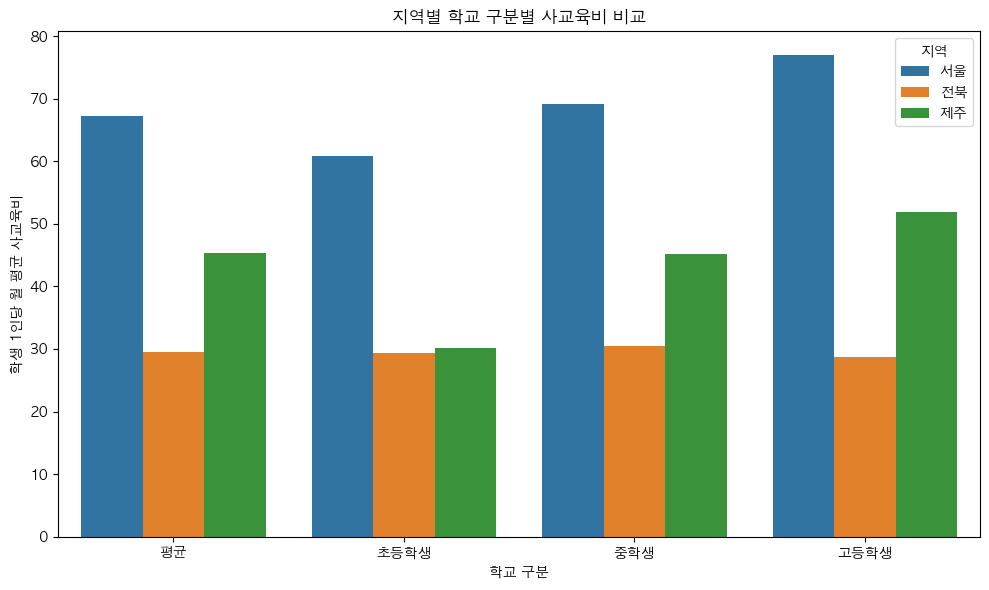

In [105]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined_df,
    x='학교 구분',
    y='학생 1인당 월 평균 사교육비',
    hue='지역'
)
plt.title('지역별 학교 구분별 사교육비 비교')
plt.ylabel('학생 1인당 월 평균 사교육비')
plt.xlabel('학교 구분')
plt.legend(title='지역')
plt.tight_layout()
plt.show()


Index(['학생 1인당 월평균 사교육비 (만원)', 'value'], dtype='object')